In [1]:
!pip install pandas
import pandas, matplotlib


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
def extractGraphFromCsv(csvFile):
    data = pandas.read_csv(csvFile, delimiter=";")
    ompList = data["threads"].unique()
    mpiList = data["Q"].unique()
    threadsList = []
    for o in ompList:
        for m in mpiList:
            threadsList.append((o,m))
    dataList = {}

    for ompth,mpith in threadsList:
        d = data.loc[(data['threads'] == ompth) & (data['Q'] == mpith)].groupby('nb')[['gflops']].mean().reset_index()
        if d.shape[0] != 0:
            dataList[(ompth,mpith)] = d

    out = pandas.DataFrame()
    out.insert(0, "Block size", dataList[threadsList[0]]["nb"])

    for ompth,mpith in dataList:
        out.insert(1, "ompTh={}, mpiTh={}".format(ompth,mpith), dataList[(ompth,mpith)]["gflops"])
    
    return out

<Axes: title={'center': 'Composyx Threads only (n=m=k=8192, -a 1)'}, xlabel='Block size', ylabel='GFlop/s'>

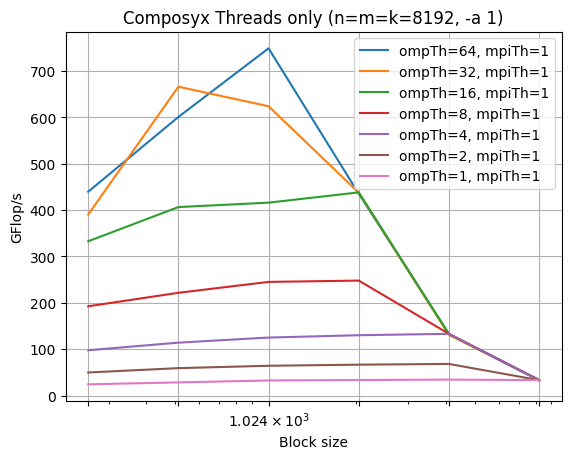

In [3]:
extractGraphFromCsv("composyx_distgemm_thread_only.csv").plot(x='Block size', ylabel="GFlop/s", title="Composyx Threads only (n=m=k=8192, -a 1)", grid=True, logx=True, xticks=[256,512, 1024, 2048, 4096, 8192])

<Axes: title={'center': 'Composyx MPI (n=m=k=8192)'}, xlabel='Block size', ylabel='GFlop/s'>

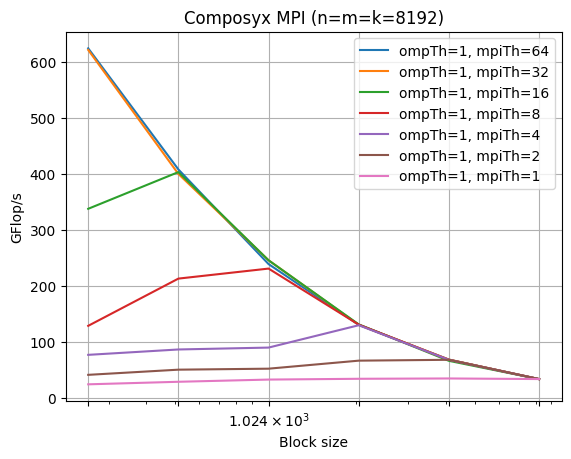

In [4]:
extractGraphFromCsv("composyx_distgemm_mpi_only.csv").plot(x='Block size', ylabel="GFlop/s", title="Composyx MPI (n=m=k=8192)", grid=True, logx=True, xticks=[256,512, 1024, 2048, 4096, 8192])

<Axes: title={'center': 'Composyx OMP + MPI (n=m=k=8192)'}, xlabel='Block size', ylabel='GFlop/s'>

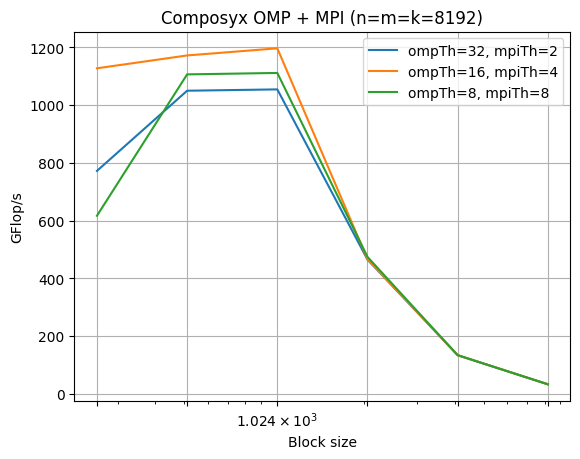

In [5]:
extractGraphFromCsv("composyx_distgemm_hybrid.csv").plot(x='Block size', ylabel="GFlop/s", title="Composyx OMP + MPI (n=m=k=8192)", grid=True, logx=True, xticks=[256,512, 1024, 2048, 4096, 8192])

<Axes: title={'center': 'Composyx task only (n=m=k=8192, -a 2)'}, xlabel='Block size', ylabel='GFlop/s'>

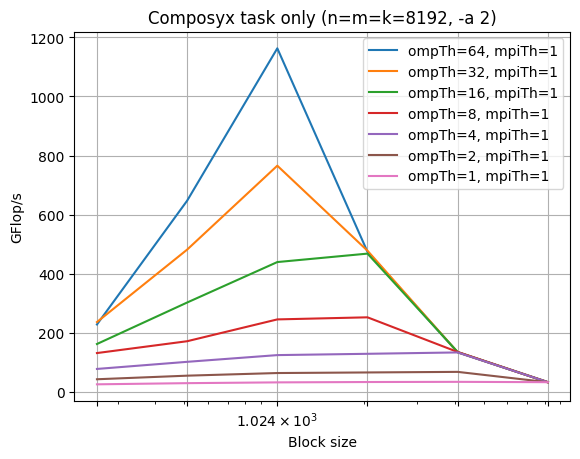

In [6]:
extractGraphFromCsv("composyx_distgemm_full_task.csv").plot(x='Block size', ylabel="GFlop/s", title="Composyx task only (n=m=k=8192, -a 2)", grid=True, logx=True, xticks=[256,512, 1024, 2048, 4096, 8192])

<Axes: title={'center': 'Composyx task only (n=m=k=8192, -a 2)'}, xlabel='Block size', ylabel='GFlop/s'>

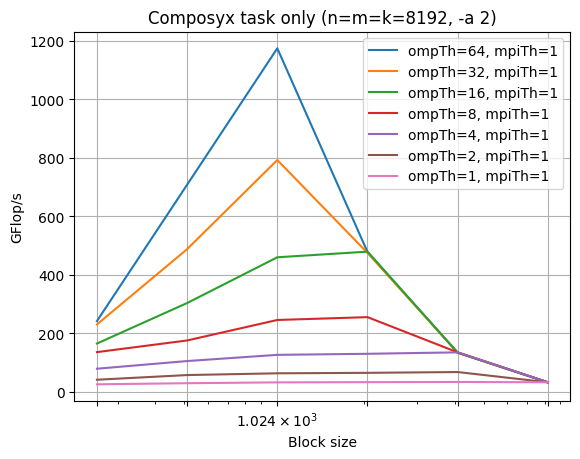

In [7]:
extractGraphFromCsv("composyx_distgemm_full_task_new.csv").plot(x='Block size', ylabel="GFlop/s", title="Composyx task only (n=m=k=8192, -a 2)", grid=True, logx=True, xticks=[256,512, 1024, 2048, 4096, 8192])

<Axes: title={'center': 'Chameleon (n=m=k=8192)'}, xlabel='Block size', ylabel='GFlop/s'>

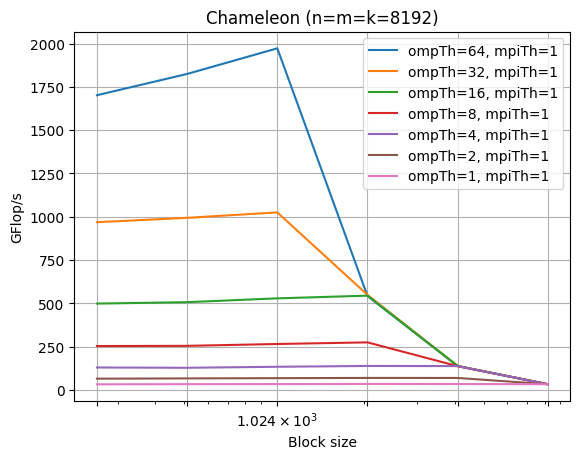

In [8]:
extractGraphFromCsv("chameleon_dtesting_thread_only.csv").plot(x='Block size', ylabel="GFlop/s", title="Chameleon (n=m=k=8192)", grid=True, logx=True, xticks=[256,512, 1024, 2048, 4096, 8192])

<Axes: title={'center': 'Chameleon MPI (n=m=k=8192)'}, xlabel='Block size', ylabel='GFlop/s'>

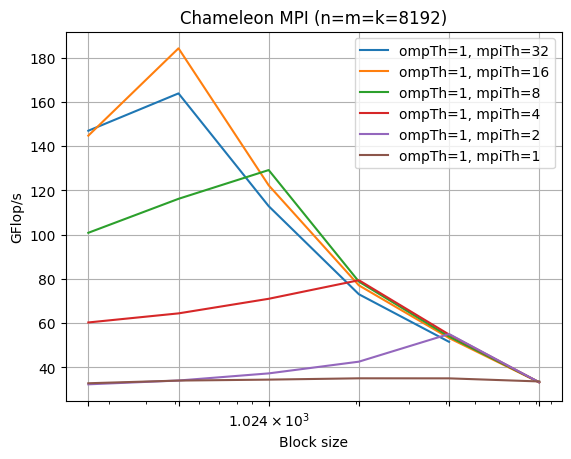

In [9]:
extractGraphFromCsv("chameleon_dtesting_mpi_only.csv").plot(x='Block size', ylabel="GFlop/s", title="Chameleon MPI (n=m=k=8192)", grid=True, logx=True, xticks=[256,512, 1024, 2048, 4096, 8192])

<Axes: title={'center': 'Chameleon MPI+OMP (n=m=k=8192)'}, xlabel='Block size', ylabel='GFlop/s'>

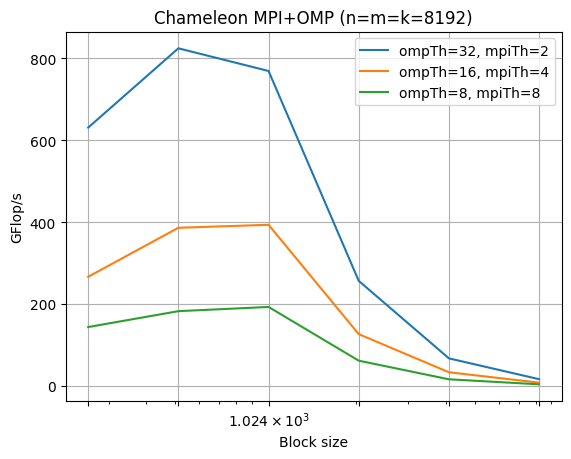

In [10]:
extractGraphFromCsv("chameleon_dtesting_hybrid.csv").plot(x='Block size', ylabel="GFlop/s", title="Chameleon MPI+OMP (n=m=k=8192)", grid=True, logx=True, xticks=[256,512, 1024, 2048, 4096, 8192])

<Axes: title={'center': 'Composyx MPI task (n=m=k=8192)'}, xlabel='Block size', ylabel='GFlop/s'>

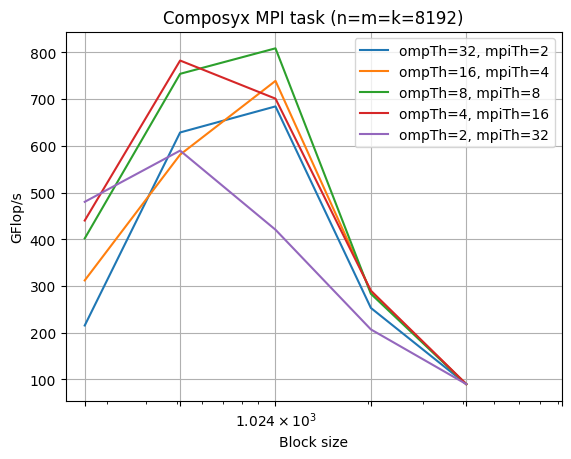

In [11]:
extractGraphFromCsv("full_task_res/composyx_distgemm_hybrid.csv").plot(x='Block size', ylabel="GFlop/s", title="Composyx MPI task (n=m=k=8192)", grid=True, logx=True, xticks=[256,512, 1024, 2048, 4096, 8192])

<Axes: title={'center': 'Block Size variation'}, xlabel='Block size', ylabel='GFlop/s'>

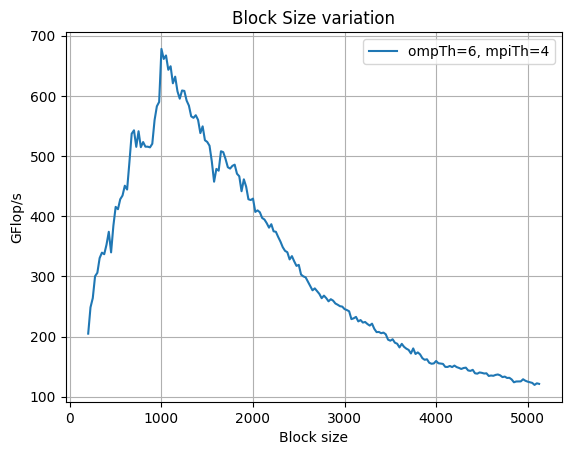

In [12]:
extractGraphFromCsv("blockTest.csv").plot(x='Block size', ylabel="GFlop/s", title="Block Size variation", grid=True)

<Axes: title={'center': 'Perfs on 2 bora node (composyx Starpu)'}, xlabel='Block size', ylabel='GFlop/s'>

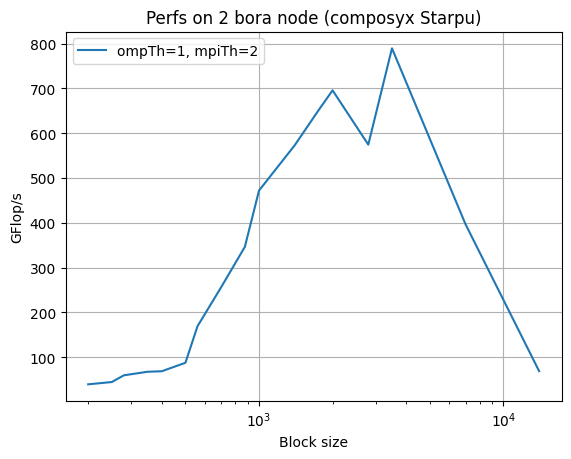

In [13]:
extractGraphFromCsv("multinode/2_bora/composyx_big_mat.csv").plot(x='Block size', ylabel="GFlop/s", title="Perfs on 2 bora node (composyx Starpu)", grid=True, logx=True)

<Axes: title={'center': 'Perfs on 2 bora node (chameleon)'}, xlabel='Block size', ylabel='GFlop/s'>

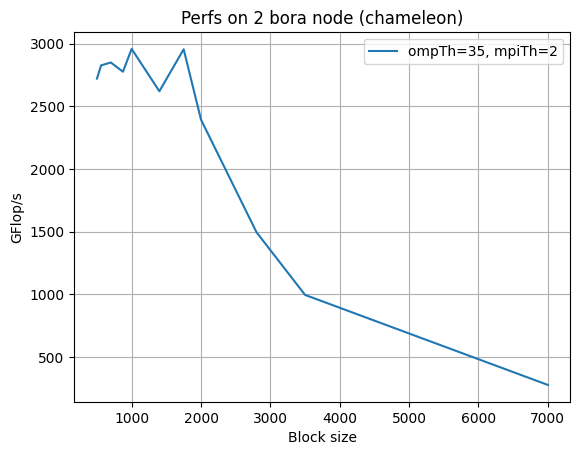

In [14]:
extractGraphFromCsv("multinode/2_bora/chameleon_result.csv").plot(x='Block size', ylabel="GFlop/s", title="Perfs on 2 bora node (chameleon)", grid=True)

In [15]:
def extractGraphFromMultipleCsv(csvFileList):
    out = pandas.DataFrame()
    first = True
    for csvFile, colName in csvFileList:
        data = pandas.read_csv(csvFile, delimiter=";")
        ompList = data["threads"].unique()
        mpiList = data["Q"].unique()
        threadsList = []
        for o in ompList:
            for m in mpiList:
                threadsList.append((o, m))
        dataList = {}
        for ompth, mpith in threadsList:
            d = data.loc[(data['threads'] == ompth) & (data['Q'] == mpith)].groupby('nb')[['gflops']].mean().reset_index()
            if d.shape[0] != 0:
                dataList[(ompth, mpith)] = d

        if (first):
            out.insert(0, "Block size", dataList[threadsList[0]]["nb"])
            first = False

        for ompth, mpith in dataList:
            out.insert(1, colName, dataList[(ompth, mpith)]["gflops"])
    
    return out

<Axes: title={'center': 'Perfs on 2 bora node (m=n=k=14000)'}, xlabel='Block size', ylabel='GFlop/s'>

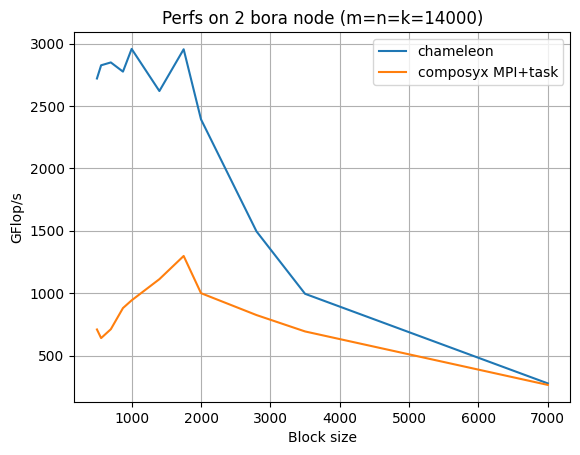

In [16]:
csvList = [("multinode/2_bora/composyx_a1.csv", "composyx MPI+task"),
           ("multinode/2_bora/chameleon_result.csv", "chameleon")]
extractGraphFromMultipleCsv(csvList).plot(x='Block size', ylabel="GFlop/s", title="Perfs on 2 bora node (m=n=k=14000)", grid=True)

<Axes: title={'center': 'Perfs on 2 bora node (m=n=k=14000)'}, xlabel='Block size', ylabel='GFlop/s'>

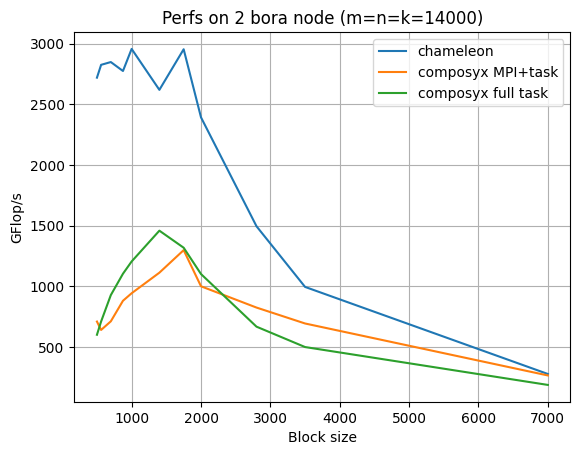

In [17]:
csvList = [("multinode/2_bora/composyx_a2.csv","composyx full task")] + csvList
extractGraphFromMultipleCsv(csvList).plot(x='Block size', ylabel="GFlop/s", title="Perfs on 2 bora node (m=n=k=14000)", grid=True)

<Axes: title={'center': 'Perfs on 2 bora node (m=n=k=14000)'}, xlabel='Block size', ylabel='GFlop/s'>

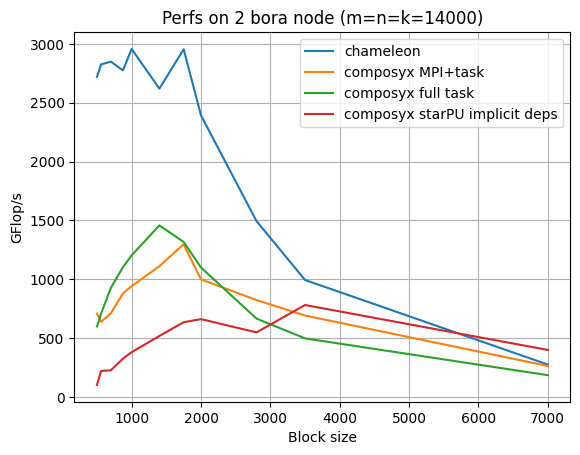

In [18]:
csvList = [("multinode/2_bora/composyx_a3.csv","composyx starPU implicit deps")] + csvList
extractGraphFromMultipleCsv(csvList).plot(x='Block size', ylabel="GFlop/s", title="Perfs on 2 bora node (m=n=k=14000)", grid=True)

<Axes: title={'center': 'Perfs on 2 bora node (m=n=k=14000)'}, xlabel='Block size', ylabel='GFlop/s'>

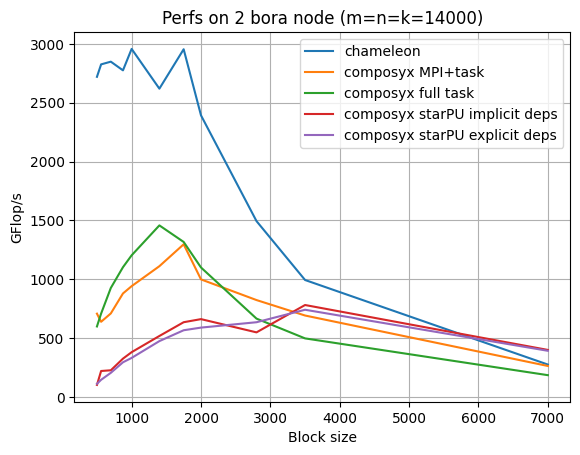

In [19]:
csvList = [("multinode/2_bora/composyx_a4.csv","composyx starPU explicit deps")] + csvList
extractGraphFromMultipleCsv(csvList).plot(x='Block size', ylabel="GFlop/s", title="Perfs on 2 bora node (m=n=k=14000)", grid=True)